Task1: Generate data centered around (-1,-1), (0,0) and (1,1)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
seed = 1234
rng = np.random.default_rng(seed)

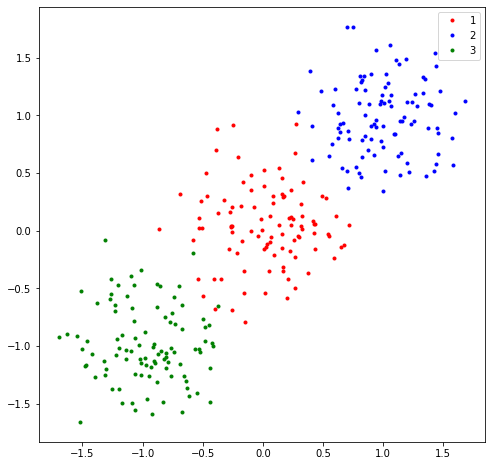

In [3]:
m1 = (0, 0)
m2 = (1,1)
m3 = (-1,-1)

spread = 0.1
cov = spread * np.eye(2)

x1 = rng.multivariate_normal(m1, cov, 100)
x2 = rng.multivariate_normal(m2, cov, 100)
x3 = rng.multivariate_normal(m3, cov, 100)

plt.figure(figsize=(8,8))
plt.plot(x1[:, 0], x1[:, 1], '.r', label='1')
plt.plot(x2[:, 0], x2[:, 1], '.b', label='2')
plt.plot(x3[:, 0], x3[:, 1], '.g', label='3')

plt.legend()

Task-2: Divide data into train and test

In [4]:
from sklearn.model_selection import train_test_split

X = np.concatenate((x1, x2, x3), axis=0)
y = np.concatenate((np.zeros(100), np.zeros(100) + 1, np.zeros(100) + 2), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(240, 2) (240,)
(60, 2) (60,)


Task-3: Gaussian model

n_classes = 3; n_features = 2; n_samples = 240; 
Dimensions of parameters (means/vars): n_classes * n_features

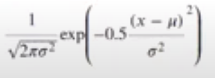

In [5]:
def logofnormal(x, mean, var):
    out = -0.5 * (np.log(2 * np.pi) + np.log(var))
    exp = -0.5 * (x - mean) ** 2 / var
    return np.sum(exp + out, axis=1)

class GaussianNB():
    def __init__(self):
        self.means = None
        self.vars = None
        self.priors = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        _, class_counts = np.unique(y, return_counts=True)
        n_classes = len(class_counts)
        self.n_classes = n_classes
        print(n_classes, n_features)
        self.means = np.zeros((n_classes, n_features))
        self.vars = np.zeros((n_classes, n_features))
        self.priors = class_counts / np.sum(class_counts)
        for c in range(n_classes):
            X_c = X[y == c]
            self.means[c] = X_c.mean(axis=0)
            self.vars[c] = X_c.var(axis=0)
    
    def predict(self, X):
        n_samples = X.shape[0]
        posteriors = np.zeros((n_samples, self.n_classes)) # for each sample, you've n_classes posteriors
        for c in range(self.n_classes):
            posteriors[:, c] = np.log(self.priors[c]) + logofnormal(X, self.means[c], self.vars[c])
        return np.argmax(posteriors, axis=1)
    
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test) 
np.sum(y_pred == y_test)/y_test.shape[0]

3 2


0.9833333333333333